In [179]:
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
csv_path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/validation/validation_full_log_agent20.csv"
agent_results_df = pd.read_csv(csv_path)

In [181]:
# Set 'Step' as the index
agent_results_df = agent_results_df.set_index('Step')

# Display the updated DataFrame (all columns should remain intact)
agent_results_df.head()


,ActionIndex,DemandScale,Reward,EffReward,Valid heads ratio,Energy reward,Q_0,Q_1,Q_2,Q_3,...,Demand_16,Demand_17,Demand_18,PumpGroupSpeed_1,PumpGroupSpeed_2,PumpPower_10,PumpPower_17,PumpPower_25,PumpPower_26,PumpPower_27
Step,,,,,,,,,,,,,,,,,,,,,
0,197,1.4,0.000000,0.000000,0.980097,-0.000000,0.000126,0.000174,0.000535,-0.000026,...,0.0,0.0,0.0,1.0,0.91,32.932724,32.884862,12.005157,12.011131,12.490966
1,197,1.2,0.364865,1.216818,0.990855,-0.851954,0.000126,0.000174,0.000535,-0.000026,...,0.0,0.0,0.0,1.0,0.91,29.085186,29.047291,10.109517,10.114796,11.322542
2,197,1.0,0.567341,1.291703,0.992469,-0.724362,0.000126,0.000174,0.000535,-0.000026,...,0.0,0.0,0.0,1.0,0.91,25.245194,25.216191,7.956520,7.960902,9.869813
3,197,0.8,0.567060,1.157116,0.993545,-0.590056,0.000126,0.000174,0.000535,-0.000026,...,0.0,0.0,0.0,1.0,0.91,21.540144,21.518669,5.434483,5.437696,8.180162
4,197,1.0,0.567341,1.291703,0.992469,-0.724362,0.000126,0.000174,0.000535,-0.000026,...,0.0,0.0,0.0,1.0,0.91,25.245194,25.216191,7.956520,7.960902,9.869813


In [197]:
df_tranposed = agent_results_df.T
df_tranposed.to_excel('agent_results_transposed.xlsx', index=True)

In [183]:
for name in agent_results_df.columns:
    print(name)

ActionIndex
DemandScale
Reward
EffReward
Valid heads ratio
Energy reward
Q_0
Q_1
Q_2
Q_3
Q_4
Q_5
Q_6
Q_7
Q_8
Q_9
Q_10
Q_11
Q_12
Q_13
Q_14
Q_15
Q_16
Q_17
Q_18
Q_19
Q_20
Q_21
Q_22
Q_23
Q_24
Q_25
Q_26
Q_27
Q_28
Q_29
Q_30
Q_31
Q_32
Q_33
Q_34
Q_35
Q_36
Q_37
Q_38
Q_39
Q_40
Q_41
Q_42
Q_43
Q_44
Q_45
Q_46
Q_47
Q_48
Q_49
Q_50
Q_51
Q_52
Q_53
Q_54
Q_55
Q_56
Q_57
Q_58
Q_59
Q_60
Q_61
Q_62
Q_63
Q_64
Q_65
Q_66
Q_67
Q_68
Q_69
Q_70
Q_71
Q_72
Q_73
Q_74
Q_75
Q_76
Q_77
Q_78
Q_79
Q_80
Q_81
Q_82
Q_83
Q_84
Q_85
Q_86
Q_87
Q_88
Q_89
Q_90
Q_91
Q_92
Q_93
Q_94
Q_95
Q_96
Q_97
Q_98
Q_99
Q_100
Q_101
Q_102
Q_103
Q_104
Q_105
Q_106
Q_107
Q_108
Q_109
Q_110
Q_111
Q_112
Q_113
Q_114
Q_115
Q_116
Q_117
Q_118
Q_119
Q_120
Q_121
Q_122
Q_123
Q_124
Q_125
Q_126
Q_127
Q_128
Q_129
Q_130
Q_131
Q_132
Q_133
Q_134
Q_135
Q_136
Q_137
Q_138
Q_139
Q_140
Q_141
Q_142
Q_143
Q_144
Q_145
Q_146
Q_147
Q_148
Q_149
Q_150
Q_151
Q_152
Q_153
Q_154
Q_155
Q_156
Q_157
Q_158
Q_159
Q_160
Q_161
Q_162
Q_163
Q_164
Q_165
Q_166
Q_167
Q_168
Q_169
Q_170
Q_171
Q_172

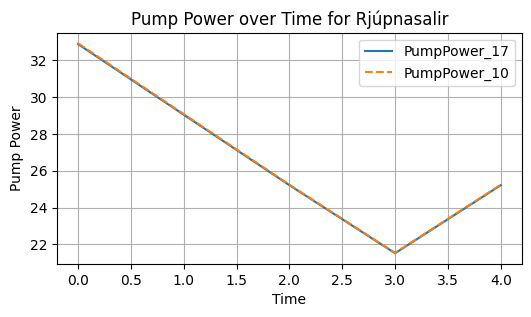

In [184]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_17'], label='PumpPower_17')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_10'], label='PumpPower_10', linestyle='--')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Rjúpnasalir")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


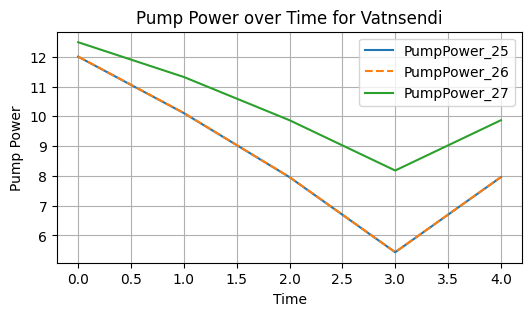

In [185]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_25'], label='PumpPower_25')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_26'], label='PumpPower_26', linestyle='--')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_27'], label='PumpPower_27')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)
# plt.ylim(8,19)

# Display the legend
plt.legend()

# Show the plot
plt.show()


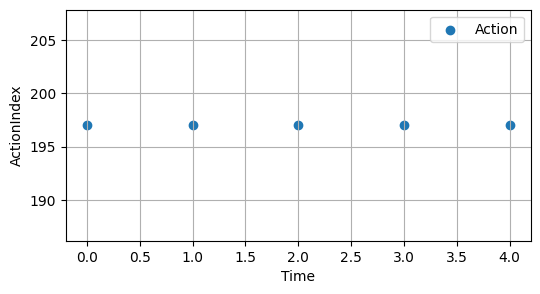

In [186]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.scatter(agent_results_df.index, agent_results_df['ActionIndex'], label='Action')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("ActionIndex")
# plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()

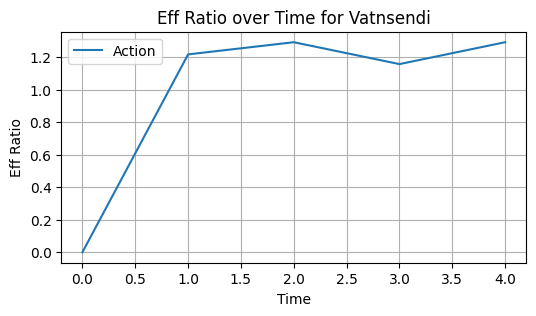

In [188]:

plt.figure(figsize=(6, 3))

# Plot the 'EffRatio' data
plt.plot(agent_results_df.index, agent_results_df['EffReward'], label='Action')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Eff Ratio")
plt.title("Eff Ratio over Time for Vatnsendi")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


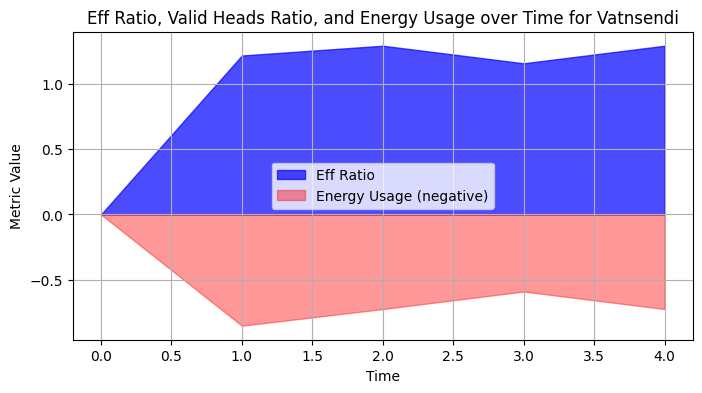

In [192]:
import matplotlib.pyplot as plt

# Create a new column for the sum of EffRatio and ValidHeadsRatio
agent_results_df['Total'] = agent_results_df['EffReward'] + agent_results_df['Energy reward']

plt.figure(figsize=(8, 4))

# Plot the stacked area chart for EffRatio and ValidHeadsRatio
plt.fill_between(agent_results_df.index, 0, agent_results_df['EffReward'], label='Eff Ratio', color='blue', alpha=0.7)


# Plot Energy (negative) below x-axis
plt.fill_between(agent_results_df.index, 0, agent_results_df['Energy reward'], label='Energy Usage (negative)', color='red', alpha=0.4)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Metric Value")
plt.title("Eff Ratio, Valid Heads Ratio, and Energy Usage over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


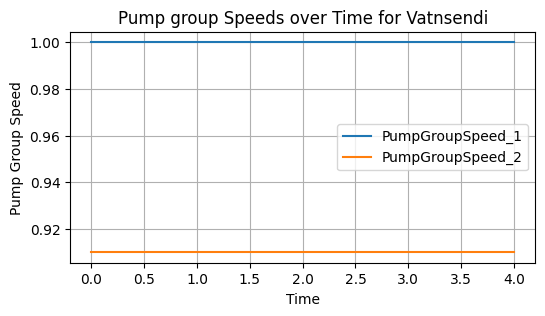

In [193]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_1'], label='PumpGroupSpeed_1')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_2'], label='PumpGroupSpeed_2')
# Plot the 'PumpPower_17' data


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Group Speed")
plt.title("Pump group Speeds over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [194]:
plt.figure(figsize=(10, 5))
for i in range(len(agent_results_df)):
    print(f"Step {i}  Group 1: {agent_results_df['PumpGroupSpeed_1'][i]},  Group 2: {agent_results_df['PumpGroupSpeed_2'][i]}, Demand scale {agent_results_df['DemandScale'][i]}")


Step 0  Group 1: 1.0,  Group 2: 0.91, Demand scale 1.4
Step 1  Group 1: 1.0,  Group 2: 0.91, Demand scale 1.2
Step 2  Group 1: 1.0,  Group 2: 0.91, Demand scale 1.0
Step 3  Group 1: 1.0,  Group 2: 0.91, Demand scale 0.8
Step 4  Group 1: 1.0,  Group 2: 0.91, Demand scale 1.0


<Figure size 1000x500 with 0 Axes>

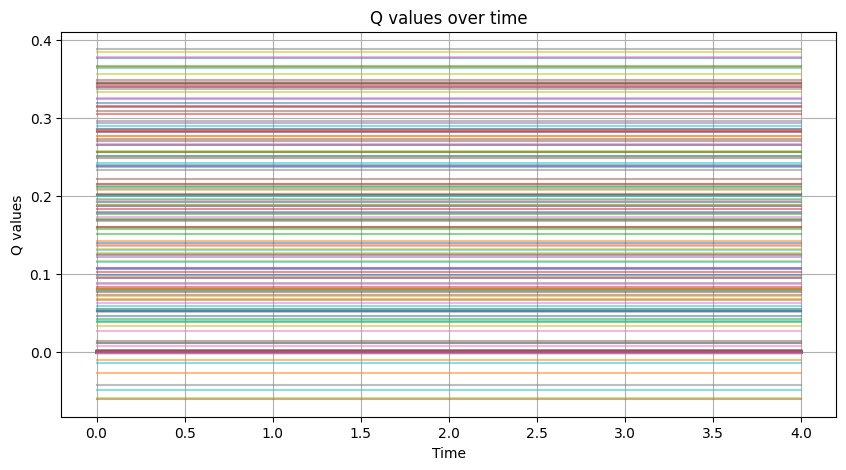

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loop through all Q-value columns
for i in range(360):
    plt.plot(agent_results_df.index, agent_results_df[f'Q_{i}'], label=f'Q_{i}', alpha=0.5)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Q values")
plt.title("Q values over time")
plt.grid(True)



# Show the plot
plt.show()


In [ ]:
agent_results_df["Re"][]